# Tarea 2
## Diego Alejandro Estrada Rivera 165352

## Parte 1

### Deberán contestar brevemente las siguientes preguntas, intentando resaltar el aspecto intuitivo y no definiciones abstractas:

### ¿Por qué una matriz equivale a una transformación lineal entre espacios vectoriales?

Porque las matrices transforman a los vectores en otros vectores de la misma forma que las transformaciones lineales. Por decir, si tenemos una matriz $$A \in Rmxn$$esta matriz tranformara un vector de nx1 en uno de mx1 de la misma que una transformacion lineal $$T: R^n -> R^m$$

### ¿Cuál es el efecto de transformación lineal de una matriz diagonal y el de una matriz ortogonal?

Las matrices diagonales son reescalamientos mientras que las matrices ortogonales son rotaciones y reflexiones

### ¿Qué es la descomposición en valores singulares de una matriz?

Todas las matrices se pueden factorizar en tres matrices de la siguiente forma: $$ A = U \Sigma V^T $$ Donde siendo A una matriz de mxn, U es una matriz ortogonal de mxm, V una matriz ortogonal de nxn y Sigma una matriz "casi" diagonal de mxn cuyos valores de la diagonal son los valores singulares acomodados de mayor a menor, rellenando con ceros los espacios necesarios para ajustar las dimensiones.

### ¿Qué es diagonalizar una matriz y que representan los eigenvectores?

Diagonalizar una matriz consiste en encontrar la descomposición de una matriz A: $$ A = W D W^{-1} $$ dodne las columnas de W son eigenvectores linealmente independientes (que por lo tanto forman una base) y los elementos de la matriz diagonal D son los respectivos eigenvalores. Si la matriz A es simétrica, los eigenvectores son ortogonales y la matriz es diagonalizable con números reales.

### Intuitivamente, ¿qué son los eigenvectores?

Un eigenvector es un vector (no un vector cero) que no sufre cambio de dirección cuando se aplica la trasnformada, únicamente puede sufrir un reescalamiento, se puede ver de la siguiente forma: $$ Av = \lambda v$$ Donde v es el eigenvector y lambda es el reescalamiento, conocido como eigenvalor

### ¿Cómo interpretas la descomposición en valores singulares como una composición de tres tipos de transformaciones lineales simples?

La descomposición SVD descompone una matriz en el producto de una rotación, un reescalamiento y finalmente otra rotación

### ¿Qué relación hay entre la descomposición en valores singulares y la diagonalización?



Al interpretar el producto de una matriz transpuesta por si misma como la descomposición SVD de ambas, se puede ver el producto así:  $$ A^TA = (U \Sigma V^T)^T(U \Sigma V^T) $$ En donde, ya que U es ortogonal, el producto de su transpuesta por si misma nos da la matriz identidad, y Sigma transpuesta por Sigma nos da otra matriz diagonal, en la cual los elementos de la diagonal son los  cuadrados de los valores singulares y V esta formado por los eigenvectores de A transpuesta por A. Viendo finalmente: $$ A^TA = V D V^T $$ Que como podemos notar, es una diagonalización. Igualmente, el producto de una matriz por su transpuesta, se puede ver como la misma diagonalización, solo que U toma el lugar de V.


### ¿Cómo se usa la descomposición en valores singulares para dar un aproximación de rango menor a una matriz?

Debido a que la información más importante en una matriz esta contenida en sus valores singulares más grandes, frecuentemente se pueden despreciar los más pequeños sin perder información escencial. Devido a que en la matriz Sigma de la descomposición SVD estos ya están acomodados de mayor a menor, es posible usar solo los primeros valores singulares (los de mayor importancia), para reconstruir una matriz "aproximada" de menor rango.

### Describe el método de minimización por descenso gradiente

Debido a que la dirección en que apunta el gradiente es perpendicular a las curvas de nivel, se puede usar este para avanzar gradualmente hasta un mínimo de la siguiente manera $$ \vec x_{k} = \vec x_{k-1} - \alpha \bigtriangledown f(\vec x_{k-1})$$ donde alpha es el tamaño del paso que se da en dirección del mínimo, también es conocido como learning rate en machine learning.

### Menciona 4 ejemplo de problemas de optimización (dos con restricciones y dos sin restricciones) que te parezcan interesantes como Científico de Datos

. Con Restricciones

En un circuito cualquiera, encontrar el valor de un resistor de manera que se maximize la potencia absorbida por el mismo, tomando en cuenta que el valor del resistor no puede ser igual o menor a cero
En la industria maquiladora, dada una combinación de procesas que se realizan durante el día, se puede buscar maximizar la producción, teniendo un presupuesto como restricción

. Sin restricciones

Considerar el número de créditos que un banco puede dar de manera que se minimice el porcentaje de delincuencia esperada de los mismos
Minimizar el material que se desperdicia considerando la forma en que se cortan vigas, troncos, etc., en una industria



## Parte 2

### Se mostrará una aplicación de la SVD a la compresión de imágenes y reducción de ruido. Podrán usar la función numpy.linalg.svd. Una imagen puede verse como un arreglo de m x n entradas donde cada entrada representa un pixel. El caso más sencillo es el caso de imágenes en blanco y negro, donde cada entrada toma un valor en el intervalo (0,1) que representa una escala de gris desde negro hasta blanco. Una imagen en este caso es simplemente una matriz numérica con coeficientes en (0,1). Este proyecto es más sencillo cuando se trabaja exclusivamente en blanco y negro. Hace el proyecto con imágenes a color es totalmente optativo y no es requerido. Deberán hacer un script de Python que realicen las siguientes tareas:

### Recibir el path de un archivo de imagen png y convertirlo en una matriz numérica que represente a la versión en blanco y negro de la imagen. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
# Recibir el path de la imagen y almacenarla en una variable en escala de grises
imagen = Image.open('C:/Users/Diego/Pictures/Nintendo.png')
imagen = imagen.convert('LA')

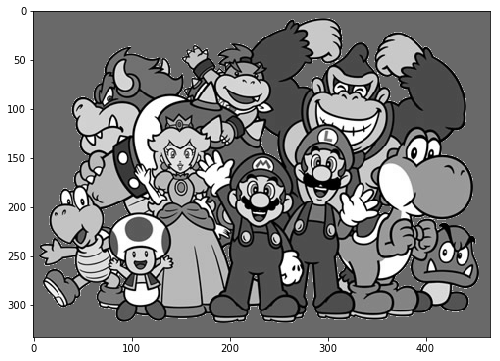

In [4]:
# Convertir imagen en una matriz numérica
matriz = np.array(list(imagen.getdata(band=0)))
matriz.shape = (imagen.size[1], imagen.size[0])
matriz = np.matrix(matriz)

# Ajustar el tamaño de la imagen y visualizarla
plt.figure(figsize=(9,6))
plt.imshow(matriz, cmap='gray');

### Realizar y verificar la descomposición

In [5]:
# Realizar la descomposición SVD
U,S,V = np.linalg.svd(matriz)

In [6]:
# Crear la matriz Sigma con los valores de S en su diagonal
Sigma = np.zeros([U.shape[1],V.shape[0]])

for i in range(Sigma.shape[0]):
    for j in range(Sigma.shape[1]):
        if (i == j):
            Sigma[i,j] = S[i]

In [7]:
# Multiplicar U*S*V
matrizReconstruida = np.dot(np.dot(U,Sigma),V)

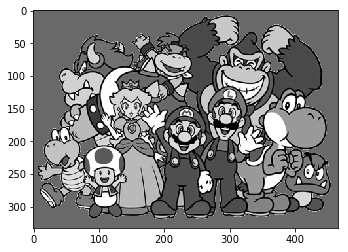

In [8]:
# Mostrar imagen formada por la matriz reconstruida para verificar
plt.imshow(matrizReconstruida, cmap='gray');

### Usar la descomposición para dar una aproximación de grado k de la imagen.

In [9]:
matriz.shape

(333, 466)

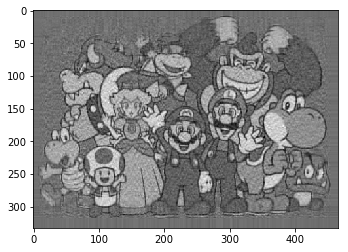

In [10]:
# Crear matriz vacía con las dimensiones adecuadas para colocar la aproximación
Aproximacion = np.zeros([matriz.shape[0],matriz.shape[1]])

# Elegir un grado k de aproximación
k = 50

for i in range(k):
    Aproximacion = Aproximacion + S[i]*np.outer(U[:,i],V[i,:])
    
plt.imshow(Aproximacion, cmap='gray');

### Para alguna imagen de su elección, elegir distintos valores de aproximación a la imagen original.

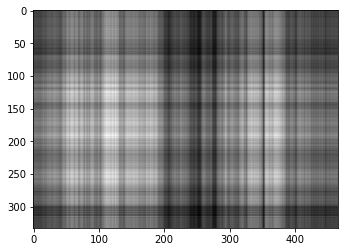

In [11]:
# Crear matriz vacía con las dimensiones adecuadas para colocar la aproximación
Aproximacion = np.zeros([matriz.shape[0],matriz.shape[1]])

# Grado 1 de aproximación
k = 1

for i in range(k):
    Aproximacion = Aproximacion + S[i]*np.outer(U[:,i],V[i,:])
    
plt.imshow(Aproximacion, cmap='gray');a = np.outer(U[:,i],V[:,i])

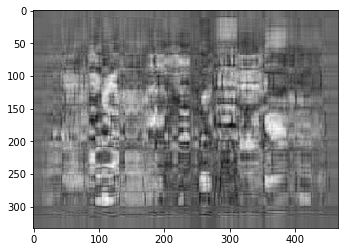

In [12]:
# Crear matriz vacía con las dimensiones adecuadas para colocar la aproximación
Aproximacion = np.zeros([matriz.shape[0],matriz.shape[1]])

# Grado 10 de aproximación
k = 10

for i in range(k):
    Aproximacion = Aproximacion + S[i]*np.outer(U[:,i],V[i,:])
    
plt.imshow(Aproximacion, cmap='gray');

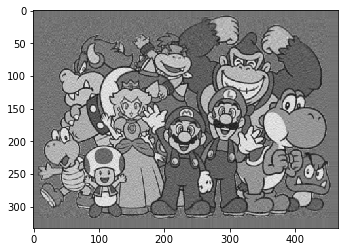

In [13]:
# Crear matriz vacía con las dimensiones adecuadas para colocar la aproximación
Aproximacion = np.zeros([matriz.shape[0],matriz.shape[1]])

# Grado 100 de aproximación
k = 100

for i in range(k):
    Aproximacion = Aproximacion + S[i]*np.outer(U[:,i],V[i,:])
    
plt.imshow(Aproximacion, cmap='gray');

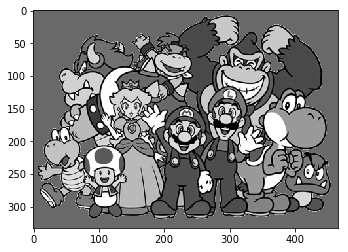

In [14]:
# Crear matriz vacía con las dimensiones adecuadas para colocar la aproximación
Aproximacion = np.zeros([matriz.shape[0],matriz.shape[1]])

# Usando todos los valores singulares disponibles
k = matriz.shape[0]

for i in range(k):
    Aproximacion = Aproximacion + S[i]*np.outer(U[:,i],V[i,:])
    
plt.imshow(Aproximacion, cmap='gray');

### Contestar, ¿qué tiene que ver este proyecto con compresión de imágenes?

Al tener los valores singulares de mayor a menor, se pueden utilizar los mayores para recrear la imagen(son los que mayor información brindan), descartando varios de los menores (que son los que menos información acerca de la imagen original brindan), usando así una menor cantidad de valores para recrear una imagen "aproximada".

### Ahora veremos la aplicación a pseudoinversa y sistemas de ecuaciones

### Programar una función que dada cualquier matriz devuelva la pseudoinversa usando la descomposición SVD. Hacer otra función que resuelva cualquier sistema de ecuaciones de la forma Ax=b usando esta pseudoinversa.

In [15]:
def pseudoinversa(A):
    import numpy as np
    if isinstance(A, np.ndarray ):
        U, S, V = np.linalg.svd(A)
        Sigma = np.zeros([U.shape[1],V.shape[0]])
        U = U.transpose()
        V = V.transpose()

        for i in range(Sigma.shape[0]):
            for j in range(Sigma.shape[1]):
                if (i == j):
                    if (S[i] == 0):
                        Sigma[i,j] == 0
                    else:
                        Sigma[i,j] = 1/S[i]
                        
        Sigma = Sigma.transpose()
        Pseudo = np.dot(np.dot(V,Sigma),U)
        return(Pseudo)
    else:
        return NotImplemented

In [16]:
A = np.array([[1,0,0,0,2],[0,0,3,0,0],[0,0,0,0,0],[0,2,0,0,0]])

In [17]:
A

array([[1, 0, 0, 0, 2],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0]])

In [18]:
P = pseudoinversa(A)

In [20]:
# La pseudoinversa de la pseudoinversa debería regresarnos la matriz original
pseudoinversa(P)

array([[ 1.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  2.,  0.,  0.,  0.]])

In [25]:
def solve(A,b):
    import numpy as np
    if isinstance(A, np.ndarray):
        if isinstance(b, np.ndarray):
            if (A.shape[0] == b.shape[0]):
                if((A.shape[0] == A.shape[1]) and (np.linalg.det(A) != 0)):
                    Ai = np.linalg.inv(A)
                    x = np.dot(Ai,b)
                    return(x)
                else:
                    Ai = pseudoinversa(A)
                    x = np.dot(Ai,b)
                    return(x)
            else:
                raise Exception("A y b deben tener el mismo numero de filas")
            
        else:
            return NotImplemented
        
    else:
        return NotImplemented

In [29]:
b = np.array([[1],[2],[5],[5]])
x = solve(A,b)

In [30]:
# Multiplicar A por el vector x obtenido de la función nos debería regresar b o su mejor aproximación
np.dot(A,x)

array([[ 1.],
       [ 2.],
       [ 0.],
       [ 5.]])

In [31]:
b

array([[1],
       [2],
       [5],
       [5]])

Jugar con el sistema Ax=b donde A=[[1,1],[0,0]] y b puede tomar distintos valores. 


In [32]:
A = np.array([[1,1],[0,0]])
b = np.array([[5],[0]])
solve(A,b)

array([[ 2.5],
       [ 2.5]])

In [33]:
A = np.array([[1,1],[0,0]])
b = np.array([[-1],[0]])
solve(A,b)

array([[-0.5],
       [-0.5]])

In [34]:
# Cuando no existe solución
A = np.array([[1,1],[0,0]])
b = np.array([[1],[1]])
solve(A,b)

array([[ 0.5],
       [ 0.5]])

### (a) Observar que pasa si b esta en la imagen de A (contestar cuál es la imagen) y si no está (ej. b = [1,1]).

La Imagen son todas las posibles combinaciones lineales de las columnas de A. Cuando la solución no existe en la imagen, la pseudoinversa proyecta en esta la solución que más se acerque.

### (b) Contestar, ¿la solución resultante es única? Si hay más de una solución, investigar que carateriza a la solución devuelta. 

In [35]:
A = np.array([[1,1],[0,0]])
b = np.array([[-1],[0]])
# Se calcula b con una solución obvia, pero que no es la que regreso el función que usa la pseudoinversa
x = np.array([[2],[-3]])
np.dot(A,x)

array([[-1],
       [ 0]])

In [36]:
# Se compara con la solución dada por la pseudoinversa
x1 = solve(A,b)
np.dot(A,x1)

array([[-1.],
       [ 0.]])

Cuando existen múltiples soluciones, la pseudoinversa nos brinda la solución de norma más pequeña

### (c) Repetir cambiando A=[[1,1],[0,1e-32]], ¿En este caso la solucíon es única? ¿Cambia el valor devuelto de x en cada posible valor de b del punto anterior?

In [37]:
A = np.array([[1,1],[0,1e-32]])
b = np.array([[1],[1]])
solve(A,b)

array([[ -1.00000000e+32],
       [  1.00000000e+32]])

In [38]:
A = np.array([[1,1],[0,1e-32]])
b = np.array([[5],[-1]])
solve(A,b)

array([[  1.00000000e+32],
       [ -1.00000000e+32]])

In [39]:
A = np.array([[1,1],[0,.001]])
b = np.array([[1],[1]])
solve(A,b)

array([[ -999.],
       [ 1000.]])

In [40]:
A = np.array([[1,1],[0,.001]])
b = np.array([[5],[-1]])
solve(A,b)

array([[ 1005.],
       [-1000.]])

Los valores no cambian sin importar que números se asignen en b. Los errores de redondeo con esta clase de números dan lugares a errores numéricos.

### En este ejercicio usarán la paquetería pandas para trabajar con datos

### Deben programar un script que lea el archivo "https://github.com/mauriciogtec/PropedeuticoDataScience2017/blob/master/Tarea/study_vs_sat.csv" y lo almacene como un data frame de pandas.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import requests

In [42]:
# Conseguir archivo del raw en github y almacenarlo en un data frame de pandas
url = "https://raw.githubusercontent.com/mauriciogtec/PropedeuticoDataScience2017/master/Tarea/study_vs_sat.csv"
link = requests.get(url).content
data_frame = pd.read_csv(io.StringIO(link.decode('utf-8')))
data_frame

,study_hours,sat_score
0,4,390
1,9,580
2,10,650
3,14,730
4,4,410
5,7,530
6,12,600
7,22,790
8,1,350
9,3,400


In [43]:
x = data_frame["study_hours"]
y = data_frame["sat_score"]

### Pleantear como un problema de optimización que intente hacer una aproximación de la forma sat_score ~ alpha + beta*study_hours minimizando la suma de los errores de predicción al cuadrado, ¿Cuál es el gradiente de la función que se quiere optimizar (hint: las variables que queremos optimizar son alpha y beta)?

Se busca encontrar valores para alpha y Beta de manera que se escriba la ecuación sat_score = alpha + Beta*study_hours minimizando lo más posible el error entre los valores observados y las predicciones de la recta, es decir, la suma de los cuadrados de sus diferencias. El gradiente de la función es (1,study_hours) 

In [44]:
# Se calculan los componentes necesarios para calcular alpha y Beta
Sx = sum(x)
Sy = sum(y)
Sxy = sum(x*y) 
Sxx = sum(x*x)
Syy = sum(y*y)
n = len(x)

In [45]:
# Se calculan Beta y alpha
Beta = (n*Sxy - Sx*Sy)/(n*Sxx - Sx**2)
alpha = Sy/n - (Beta*Sx)/n

### Programar una función que reciba valores de alpha, beta y el vector study_hours y devuelva un vector array de numpy de predicciones alpha + beta*study_hours_i, con un valor por cada individuo

In [46]:
# Vector study_hours
study_hours = np.array(x)

In [47]:
# Se define función para encontrar vector de predicciones
def OLS(a, B, x):
    rows = len(x)
    sat_score = np.array([a + B*x[i] for i in range(rows)])
    
    return(sat_score)

In [48]:
# Vector sat_score de predicciones de acuerdo a la recta
sat_score = OLS(alpha,Beta,study_hours)
sat_score

array([ 454.47075061,  581.1030895 ,  606.42955728,  707.73542839,
        454.47075061,  530.45015394,  657.08249283,  910.34717061,
        378.49134728,  429.14428283,  555.77662172,  631.75602506,
        479.79721839,  505.12368617,  606.42955728,  631.75602506,
        758.38836395,  682.40896061,  682.40896061,  606.42955728])

### Definan un numpy array X de dos columnas, la primera con unos en todas sus entradas y la segunda con la variable study_hours. Observen que X\*[alpha,beta] nos devuelve alpha + beta\*study_hours_i en cada entrada y que entonces el problema se vuelve sat_score ~ X\*[alpha,beta]

In [49]:
len(x)
# Se crea la columna de 1's
columna1 = [1 for i in range(len(x))]
# Se combina la columan de 1's y la variable study_hours en una matriz 
X = np.array([columna1,data_frame["study_hours"]])
X = X.transpose()

#Se crea el vector "x" con alpha y Beta
vector = np.array([alpha,Beta])

In [50]:
np.dot(X,vector)

array([ 454.47075061,  581.1030895 ,  606.42955728,  707.73542839,
        454.47075061,  530.45015394,  657.08249283,  910.34717061,
        378.49134728,  429.14428283,  555.77662172,  631.75602506,
        479.79721839,  505.12368617,  606.42955728,  631.75602506,
        758.38836395,  682.40896061,  682.40896061,  606.42955728])

### Calculen la pseudoinversa  X^+ de X y computen (X^+)*sat_score para obtener alpha y beta soluciones.

In [51]:
Xi=pseudoinversa(X)

In [52]:
np.dot(Xi,data_frame["sat_score"])

array([ 353.1648795 ,   25.32646778])

### Comparen la solución anterior con la de la fórmula directa de solución exacta (alpha,beta)=(X^t*X)^(-1)*X^t*sat_score.

In [53]:
arraySolucion = np.dot(Xi,data_frame["sat_score"])

In [54]:
arraySolucion[0]

353.16487949888494

In [55]:
alpha

353.16487949888523

In [56]:
arraySolucion[1]

25.32646777789579

In [57]:
Beta

25.326467777895743

### Usen la libreria matplotlib par visualizar las predicciones con alpha y beta solución contra los valores reales de sat_score.

In [58]:
sat_score = OLS(alpha,Beta,study_hours)

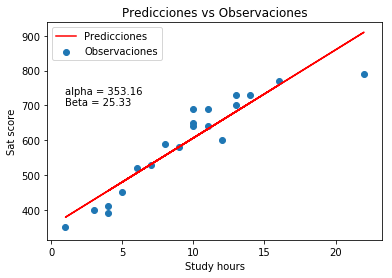

In [59]:
# Recta de las predicciones
plt.plot(data_frame["study_hours"],sat_score, label="Predicciones", color="r")
# Scatter de las observaciones
plt.scatter(data_frame["study_hours"],data_frame["sat_score"], label="Observaciones")
# Títulos y nombre de los ejes
plt.xlabel('Study hours')
plt.ylabel("Sat score")
plt.title("Predicciones vs Observaciones")
# Impresión de la leyenda e información adicional
plt.text(1,700,"alpha = %.2f\nBeta = %.2f" %(alpha, Beta))
plt.legend();

### Programen el método de descenso gradiente para obtener alpha y beta por vía de un método numérico de optimización. Experimenten con distintos learning rates (tamaños de paso).

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import requests

In [61]:
# Conseguir archivo del raw en github y almacenarlo en un data frame de pandas
url = "https://raw.githubusercontent.com/mauriciogtec/PropedeuticoDataScience2017/master/Tarea/study_vs_sat.csv"
s = requests.get(url).content
data_frame = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [62]:
# Separar en data frames para cada variable
x = pd.DataFrame(data_frame.study_hours)
y = pd.DataFrame(data_frame.sat_score)
n = len(x)

In [63]:
# Learning rate o tamaño de paso
lr = 0.01

In [64]:
## Agregar columna de 1's
x["1's"] = 1

In [65]:
# Pasar data frames a numpy arrays
x = np.array(x)
y = np.array(y).flatten()

o = np.array([0, 0])

In [66]:
def FuncionCosto(x, y, o):
     
    ## Calculate the cost with the given parameters
    J = np.sum((x.dot(o)-y)**2)/2/n
    
    return J

In [67]:
FuncionCosto(x,y,o)

184192.5

In [68]:
# Realiza el gradiente descendente mientras va a aprendiendo en o, de acuerdo al numero de repeticiones
def Gradiente(x, y, o, lr, repeticiones):
    CostoTotal = [0] * repeticiones
    
    for repeticion in range(repeticiones):
        hipotesis = x.dot(o)
        perdida = hipotesis-y
        gradiente = x.T.dot(perdida)/n
        o = o - lr*gradiente
        costo = FuncionCosto(x, y, o)
        CostoTotal[repeticion] = costo

    return o, CostoTotal

In [69]:
(t, c) = Gradiente(x,y,o,lr, 1500)

In [70]:
# Valores de Beta y alpha
t

array([  26.62906681,  337.63806533])